In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm

### Missing Data and Imputation

Types of missingness

From [National Institutes of Health, National Library of Medicine](https://www.ncbi.nlm.nih.gov/books/NBK493614/)

1. *Missing completely at random (MCAR)*. When data are MCAR, the fact that the data are missing is independent of the observed and unobserved data. In other words, no systematic differences exist between participants with missing data and those with complete data. For example, some participants may have missing laboratory values because a batch of lab samples was processed improperly. In these instances, the missing data reduce the analyzable population of the study and consequently, the statistical power, but do not introduce bias: when data are MCAR, the data which remain can be considered a simple random sample of the full data set of interest. MCAR is generally regarded as a strong and often unrealistic assumption.

2. *Missing at random (MAR)*. When data are MAR, the fact that the data are missing is systematically related to the observed but not the unobserved data. For example, a registry examining depression may encounter data that are MAR if male participants are less likely to complete a survey about depression severity than female participants. That is, if probability of completion of the survey is related to their sex (which is fully observed) but not the severity of their depression, then the data may be regarded as MAR. Complete case analyses, which are based on only observations for which all relevant data are present and no fields are missing, of a data set containing MAR data may or may not result in bias. If the complete case analysis is biased, however, proper accounting for the known factors (in the above example, sex) can produce unbiased results in analysis.

3. *Missing not at random (MNAR)*. When data are MNAR, the fact that the data are missing is systematically related to the unobserved data, that is, the missingness is related to events or factors which are not measured by the researcher. To extend the previous example, the depression registry may encounter data that are MNAR if participants with severe depression are more likely to refuse to complete the survey about depression severity. As with MAR data, complete case analysis of a data set containing MNAR data may or may not result in bias; if the complete case analysis is biased, however, the fact that the sources of missing data are themselves unmeasured means that (in general) this issue cannot be addressed in analysis and the estimate of effect will likely be biased.

How we deal with missingness often depends on the data collection processes.  It is important to understand the way in which the data was collected before we can make a determination among the above categories.  That said, for some of our datasets it is hard to know and the distinctions above can be quite subtle.



In [3]:
# import pandas, numpy and matplotlib libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors

In [4]:
penguins = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv", na_values=['NA'])
# remove rows with missing data
penguins.dropna(inplace=True)
penguins.head()
penguins_dropall=penguins

In [5]:
penguins = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv", na_values=['NA'])
penguins_original=penguins

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [6]:

# Identify rows with missing values
rows_with_missing = penguins[penguins.isnull().any(axis=1)]

# Print the rows with missing values
print(rows_with_missing)
print(rows_with_missing.info())

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   
271  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  year  
3            NaN  NaN  2007  
8         3475.0  NaN  2007

So from the above output we can see that there are 11 rows with missing data.  Two of the rows have nearly every feature/variable missing.  There is not much to go on for those rows.

In [7]:
penguins.dropna(subset=['bill_length_mm'], inplace=True)
# create a dataset of the filtered observations.
penguins_filtered1=penguins

So now we are left with nine rows of missing values and all of the missingness is in the 'sex' variable.

In [8]:
# Identify rows with missing values
rows_with_missing = penguins[penguins.isnull().any(axis=1)]

# Print the rows with missing values
print(rows_with_missing)
print(rows_with_missing.info())

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
178  Gentoo     Biscoe            44.5           14.3              216.0   
218  Gentoo     Biscoe            46.2           14.4              214.0   
256  Gentoo     Biscoe            47.3           13.8              216.0   
268  Gentoo     Biscoe            44.5           15.7              217.0   

     body_mass_g  sex  year  
8         3475.0  NaN  2007  
9         4250.0  NaN  2007  
10        3300.0  NaN  2007  
11        3700.0  NaN  2007  
47        2975.0  NaN  2007  
178       4100.0  NaN  2007  
218       4650.0  NaN  2008  

It is entirely possible in this case that the missing values are MCAR since sex is likely something that takes time to assess and so having not observed the sex of a penguin likely is unrelated to why the observation is missing.  Here's a quote from a 2012 publication on this topic: 'While some avian taxa have conspicuous sexual variation in plumage, penguins have monomorphic plumage and are difficult to sex
by direct observation. Methods of sexing penguins have focused on dissection, cloacal examination, behavior cues, morphometric analysis and, more recently, molecular techniques...' [](http://www.marineornithology.org/PDF/40_2/40_2_89-94.pdf)

This would suggest that what we have is observations whose missingness is MCAR.  

Now we have to find good ways to impute these values.  Imputation is much like prediction, so we'll treat the full data as train and we'll predict the rows with missingness as the test data.  

Unfortunately we do not have true values for the sex of the penguins so we won't be able to assess the accuracy of our predictions.  

Because each species is likely different we are going to do our imputation separately for each species.
Since only Adelie and Gentoo penguins have missing values, we'll just make two dataframes and we will use the *preguins_dropall* as our starting point since there are no missing values among those data.


In [9]:
adelie=penguins_dropall[penguins_dropall['species']=='Adelie']
adelie_with_missing=rows_with_missing[rows_with_missing['species']=='Adelie']
#print(adelie.info())
gentoo=penguins_dropall[penguins_dropall['species']=='Gentoo']
gentoo_with_missing = rows_with_missing[rows_with_missing['species']=='Gentoo']
#print(gentoo.info())

### Imputing

For these two datasets we are going to create two sets of imputation using k-Nearest Neighbors and Logistic Regression.  

We'll start with the Adelie penguins.

In [10]:
X_train=adelie[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y_train=adelie['sex']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test=adelie_with_missing[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
X_test_scaled = scaler.transform(X_test)

In [11]:
# initiate and fit the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
# get the predicted values
knn_amelie = knn.predict(X_test_scaled)
print(knn_amelie)

['female' 'male' 'female' 'female' 'female']


So the array above is the predicted values for the 'sex' of the five amelie penguins that were predicted from using k Nearest Neighbors where k=9.  

In [12]:
X_train2=pd.DataFrame(X_train_scaled,columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])
print(X_train2.info())
# This is the scikit learn version of the logistic regression
model = LogisticRegression()

# Train the model
model.fit(X_train2, y_train)

# Make predictions
logit_amelie = model.predict(X_test_scaled)
print(logit_amelie)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     146 non-null    float64
 1   bill_depth_mm      146 non-null    float64
 2   flipper_length_mm  146 non-null    float64
 3   body_mass_g        146 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB
None
['female' 'male' 'female' 'female' 'female']


/home/tommie-clark/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


So both of our methods here are in agreement about what the missing values should be.  That is good news.  

Now we'll turn our attendtion to the Gentoo penguins.

In [13]:
X_train=gentoo[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y_train=gentoo['sex']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test=gentoo_with_missing[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
X_test_scaled = scaler.transform(X_test)

In [14]:
# initiate and fit the model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
# get the predicted values
knn_gentoo = knn.predict(X_test_scaled)
print(knn_gentoo)

['female' 'female' 'female' 'male']


In [15]:
X_train2=pd.DataFrame(X_train_scaled,columns=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'])
print(X_train2.info())
# This is the scikit learn version of the logistic regression
model = LogisticRegression()

# Train the model
model.fit(X_train2, y_train)

# Make predictions
logit_amelie = model.predict(X_test_scaled)
print(logit_amelie)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     119 non-null    float64
 1   bill_depth_mm      119 non-null    float64
 2   flipper_length_mm  119 non-null    float64
 3   body_mass_g        119 non-null    float64
dtypes: float64(4)
memory usage: 3.8 KB
None
['female' 'female' 'female' 'female']


/home/tommie-clark/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Uh-oh.  So now our predicted values are different for the two different methods.  So we have some additional investigation to do.  Let's look at the predicted probabilities from the logistic regression.

In [16]:
# predicted probabilities for 
model.predict_proba(X_test_scaled)

/home/tommie-clark/anaconda3/lib/python3.12/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.99752968, 0.00247032],
       [0.96431351, 0.03568649],
       [0.96907417, 0.03092583],
       [0.52311797, 0.47688203]])

So the output above is the probability that the logistic regression model outputs as predicted probability of being in each class here 'male' and 'female'.  For the last observation there is a bit of a split there on the probability since both values are close to 0.5.  

So let's look at the nearest neighbors for some other values for *k*.

In [17]:
# initiate and fit the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
# get the predicted values
knn_gentoo = knn.predict(X_test_scaled)
print(knn_gentoo)

['female' 'female' 'female' 'male']


In [18]:
# initiate and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
# get the predicted values
knn_gentoo = knn.predict(X_test_scaled)
print(knn_gentoo)

['female' 'female' 'female' 'male']


In [19]:
# initiate and fit the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
# get the predicted values
knn_gentoo = knn.predict(X_test_scaled)
print(knn_gentoo)

['female' 'female' 'female' 'male']


Nearest neighbors seems to be very consistent and logistic seems a bit torn about the appropriate value.  Seems enough to 
say lets go with 'female' as the predicted value.

In [20]:
print(adelie_with_missing)
adelie_with_missing['sex']=knn_amelie
print(adelie_with_missing)

   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
47  Adelie      Dream            37.5           18.9              179.0   

    body_mass_g  sex  year  
8        3475.0  NaN  2007  
9        4250.0  NaN  2007  
10       3300.0  NaN  2007  
11       3700.0  NaN  2007  
47       2975.0  NaN  2007  
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   


/tmp/ipykernel_8580/2357933609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adelie_with_missing['sex']=knn_amelie


In [21]:
print(gentoo_with_missing)
gentoo_with_missing['sex']=knn_gentoo
print(gentoo_with_missing)

    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
178  Gentoo  Biscoe            44.5           14.3              216.0   
218  Gentoo  Biscoe            46.2           14.4              214.0   
256  Gentoo  Biscoe            47.3           13.8              216.0   
268  Gentoo  Biscoe            44.5           15.7              217.0   

     body_mass_g  sex  year  
178       4100.0  NaN  2007  
218       4650.0  NaN  2008  
256       4725.0  NaN  2009  
268       4875.0  NaN  2009  
    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
178  Gentoo  Biscoe            44.5           14.3              216.0   
218  Gentoo  Biscoe            46.2           14.4              214.0   
256  Gentoo  Biscoe            47.3           13.8              216.0   
268  Gentoo  Biscoe            44.5           15.7              217.0   

     body_mass_g     sex  year  
178       4100.0  female  2007  
218       4650.0  female  2008  
256       4725.0  f

/tmp/ipykernel_8580/1676825842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gentoo_with_missing['sex']=knn_gentoo


In [22]:
gentoo_imputed=pd.concat([gentoo,gentoo_with_missing])
adelie_imputed=pd.concat([adelie,adelie_with_missing])

In [23]:
penguins_imputed=pd.concat([penguins_dropall,gentoo_with_missing,adelie_with_missing])

So now we have a dataframe that is completely filled and we can use all of the methods that we have considered in this course.  

### Tasks

1. Suppose we wanted to determine which would be the best value for k in the kNN algorithm above.  How might you go about that?


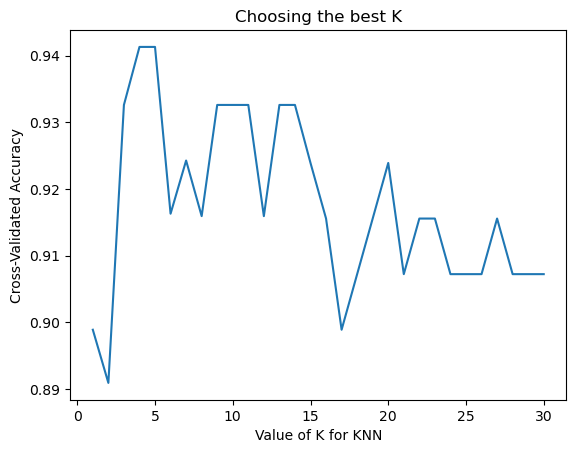

Best K value: 5


In [24]:
# find best k value for knn_gentoo
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Range of k values to test
k_range = range(1, 31)
k_scores = []

# Loop through k values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Plot k values vs cross-validated accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Choosing the best K')
plt.show()

# Best k
best_k = k_range[k_scores.index(max(k_scores))]
print(f"Best K value: {best_k}")





2. Suppose that the missing values was numeric, how would the above strategy change?